## 분류(classification) 분석 방법론 - 로지스틱 회귀모형(logistic regression model)

In [1]:
from IPython.display import Image

- 로지스틱 회귀 역시 대표적인 지도학습 유형의 분석 기법으로 선형 회귀와 다르게 값을 예측하는 것이 아니라 클래스를 예측 및 분류하는 기법이다. (참/거짓의 이진 분류)

In [2]:
Image('C:/Users/com/Desktop/data_science/2022_1/Lecture_07/figure1.jpg', width = 600)

- 로지스틱 회귀에서는 선형 함수를 사용하지 않고 S자 함수인 시그모이드(sigmoid) 함수를 사용한다.

$$
\begin{equation} 
y = \frac{1}{1+e^{ax+b}} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
\end{equation}
$$

- 시그모이드 함수에서 x값이 커지면 y값은 1에 근사하게 되고 x값이 작아지면 y값은 0에 근사하게 된다.
<br><br>
- 이러한 특성을 이용하여 두 개의 값을 분류하는 이진 분류에 많이 사용된다.

### 로지스틱 회귀의 성능 평가 지표

- 오차행렬(confusion matrix)

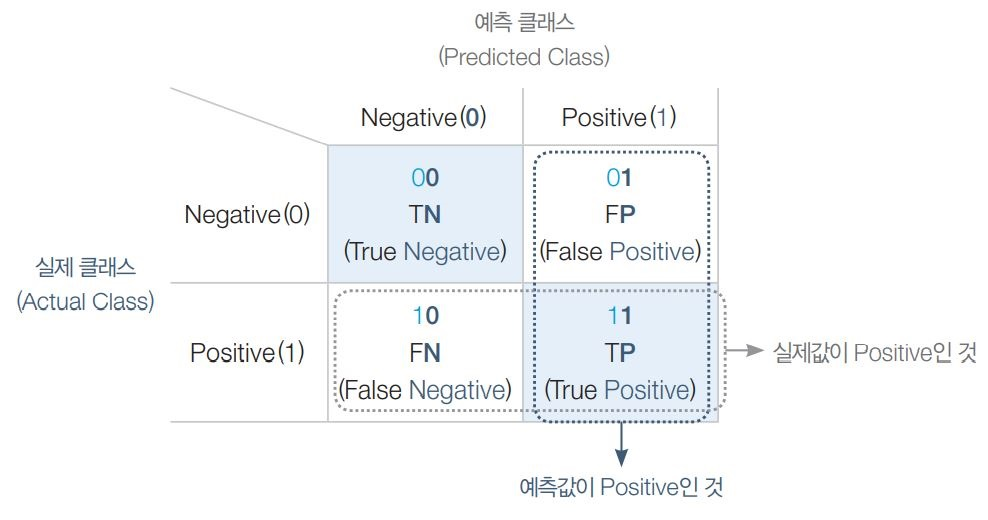

In [3]:
Image('C:/Users/com/Desktop/data_science/2022_1/Lecture_07/figure2.jpg', width = 600)

$
\begin{equation}
Accuracy \ (정확도) = \frac{예측 결과와 실제값이 동일한 건수}{전체 예측 건수} = \frac{TN+TP}{TN+FP+FN+TP}
\end{equation}
$

- 전체 예측건수에서 예측이 성공한 건수의 비율을 나타낸 값을 정확도(accuracy)로 나타낸다.

$
\begin{equation}
Precision \ (정밀도) = \frac{TP}{FP+TP}
\end{equation}
$

- 정밀도(precision)는 예측이 Positive인 것(TP, FP) 중 참인 것(TP)의 비율을 의미한다. 즉, Positive 예측 성능을 더 정밀하게 평가하기 위한 지표이다.

$
\begin{equation}
Recall \ (재현율) = \frac{TP}{FN+TP}
\end{equation}
$

- 재현율(recall)은 실제값이 Positive인 것(FN+TP)인 것 중에서 참인 것(TP)의 비율을 의미한다. 즉, Positive인 데이터를 정확히 예측했는지 평가하는 지표로 민감도(sensitivity) 또는 TPR(True Positive Rate)라고도 부른다.

$
\begin{equation}
F1 = 2\times \frac{Precision \times Recall}{Prescision + Recall}
\end{equation}
$

- F1 스코어(F1 score)는 정밀도와 재현율을 결합한 평가 지표이다. 정밀도와 재현율이 서로 트레이드 오프 관계(trade-off, 상충관계)인 문제저을 고려하여 정확한 평가를 위해 많이 사용한다.

### 유방암 진단 예측

- 데이터 불러오기: 사이킷런(sklearn)에서 제공하는 유방암 진단 데이터셋을 사용

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
b_cancer = load_breast_cancer()
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### [데이터 설명]
- 데이터: 위스콘신 유방암 진단 데이터
- 관측치 개수: 569개
- 변수 개수: 독립변수 30개 / 종속변수 1개


#### 독립변수 (세포 특징)
- radius : 반경 (중심에서 외벽까지 거리들의 평균값)
- texture : 질감 (Gray-Scale 값들의 표준편차)
- perimeter : 둘레
- area : 면적
- smoothness : 매끄러움 (반경길이의 국소적 벼노하)
- compactness : 조그만 정도 (둘레^2/면적-1)
- concavity : 오목함(윤관의 오목한 부분의 정도)
- concave points : 오목한 점의 수
- symmetry : 대칭
- fractal dimension : 프랙탈 차원 (해안선근사-1)

#### 종속변수 (양성 여부)
- malignant : 0, 악성 / Benign : 1, 양성

In [3]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns =b_cancer.feature_names)
b_cancer_df['diagnosis'] = b_cancer.target
print('데이터셋 크기: ', b_cancer_df.shape)
b_cancer_df.head()

데이터셋 크기:  (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [27]:
b_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- 독립변수로 사용할 데이터를 평균이 0, 분산이 1이되는 정규분포 형태로 수정

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

In [29]:
print(b_cancer_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [30]:
print(b_cancer_scaled[9])

[-0.47353452  1.10543868 -0.32948179 -0.50906338  1.58269942  2.56335845
  1.73887209  0.94176033  0.79729802  2.78309559 -0.38825014  0.6933453
 -0.40941963 -0.36076377  0.03600849  2.60958662  1.5098476   0.40939496
 -0.32113637  2.37734605 -0.24418961  2.44310906 -0.28627803 -0.29740917
  2.32029536  5.11287727  3.99543285  1.6200152   2.3704438   6.84685604]


In [31]:
print(b_cancer_scaled[17])

[ 5.68797577e-01  3.23544126e-01  6.64437745e-01  4.09297356e-01
  1.46883471e+00  1.85457312e+00  1.04709318e+00  1.38980180e+00
  1.28652444e+00  1.52568080e+00  5.92011298e-01 -2.60999587e-01
  4.89060924e-01  3.04567927e-01 -4.99317257e-03 -2.61640642e-02
 -4.54793148e-04  1.90411911e-01 -4.42214870e-01  1.31289578e-01
  9.71384843e-01  9.44946175e-01  8.79837547e-01  7.63666941e-01
  2.03974566e+00  1.07529849e+00  9.89304603e-01  1.41141082e+00
  1.30270860e+00  1.67656027e+00]


In [32]:
print(b_cancer_scaled[29])

[ 0.97777802 -0.98659467  0.94865013  0.85383059  0.15013907  0.21527015
  0.12493055  0.78957583 -0.2651265  -0.1853673   0.70425773 -0.71549273
  0.88558044  0.45681976 -0.47134541  0.27116829  0.07215909  0.28287142
 -0.1564696  -0.02001096  0.77465644 -1.00266557  0.82324445  0.60897062
 -0.30109094  0.17134395 -0.11172705  0.47192976 -0.23418298 -0.2635475 ]


- 로지스틱 회귀 모형 구축

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [34]:
# X, Y 설정
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled

In [35]:
# 훈련용, 테스트용 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [36]:
lr_b_cancer = LogisticRegression() # 로지스틱 회귀 모형 생성
lr_b_cancer.fit(X_train, Y_train) # 로지스틱 회귀 모형 훈련

LogisticRegression()

In [37]:
Y_predict = lr_b_cancer.predict(X_test)

In [38]:
lr_b_cancer.coef_

array([[-0.25965337, -0.58891309, -0.27527119, -0.35070364, -0.13501664,
         0.41458176, -0.67094946, -0.74096029, -0.37987661,  0.03289321,
        -1.35087219,  0.14092099, -0.90852156, -0.98001244,  0.25957915,
         0.92374666, -0.13448413, -0.34937963,  0.16812679,  0.91359164,
        -0.8473647 , -0.91043792, -0.73517119, -0.84764528, -0.56888501,
         0.17670599, -0.82594672, -1.08228373, -0.48409262, -0.60758107]])

In [39]:
lr_b_cancer.intercept_

array([0.04258607])

- 로지스틱 회귀 모형 성능 확인 

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [41]:
# 오차행렬 확인
confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]])

In [42]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

In [43]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f}'.format(accuracy, precision, recall, f1))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991, F1: 0.982


In [44]:
lr_b_cancer.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([1])

In [45]:
lr_b_cancer.predict([[1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0]])

array([0])

In [46]:
print(167/171) # 정확도

0.9766081871345029


In [47]:
print(107/110) # 정밀도

0.9727272727272728


In [48]:
print(107/108) # 재현율

0.9907407407407407


In [49]:
2*(0.97*0.99)/(0.97+0.99) # F1 스코어

0.9798979591836734